In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\apple.csv")


In [34]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [35]:
# Clean the ' Close/Last' column by removing the dollar sign and spaces
df[' Close/Last'] = df[' Close/Last'].str.replace('$', '').str.strip().astype(float)




In [38]:
df[' Open'] = df[' Open'].str.replace('$', '').str.strip().astype(float)


In [39]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,$278.41,$256.37
1,02/27/2020,273.5200,80151380,281.1000,$286,$272.96
2,02/26/2020,292.6500,49678430,286.5300,$297.88,$286.5
3,02/25/2020,288.0800,57668360,300.9500,$302.53,$286.13
4,02/24/2020,298.1800,55548830,297.2600,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,$31.3857,$30.6614
2514,03/04/2010,30.1014,89591907,29.8971,$30.1314,$29.8043
2515,03/03/2010,29.9043,92846488,29.8486,$29.9814,$29.7057
2516,03/02/2010,29.8357,141486282,29.9900,$30.1186,$29.6771


In [40]:
df[' High'] = df[' High'].str.replace('$', '').str.strip().astype(float)


In [41]:
df[' Low'] = df[' Low'].str.replace('$', '').str.strip().astype(float)


In [42]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771


In [43]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.timestamp)

In [44]:
# Features and target
X = df[['Date']]
y = df[' Close/Last']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Make predictions
y_pred = model.predict(X_test)


In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.8560759066229635
Mean Absolute Error (MAE): 16.39465682912435
Root Mean Squared Error (RMSE): 21.49144790897223


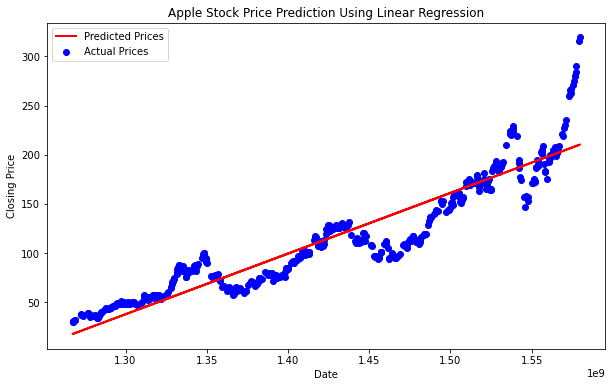

In [48]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.title('Apple Stock Price Prediction Using Linear Regression')
plt.show()